In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.shape

(5572, 5)

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#Drop unwanted column
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Rename the Column 
df.rename(columns={'v1':'Lable','v2':"Message"},inplace=True)
df.head()

,Lable,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA (Exploratoy Data Analysis)

In [8]:
#Describe with Respect to Lable
df.groupby('Lable').describe()

Message                                                               
        count unique                                                top freq
Lable                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
df.describe(include='all')

,Lable,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
'''From above information, we know that:

only about 15% of the text messages is classified as a spam.
there are some duplicate messages, since the number of unique values lower than the count values of the text.
in the next part, let check the length of each text messages to see whether it is correlated with the text classified as a spam or not.'''

'From above information, we know that:\n\nonly about 15% of the text messages is classified as a spam.\nthere are some duplicate messages, since the number of unique values lower than the count values of the text.\nin the next part, let check the length of each text messages to see whether it is correlated with the text classified as a spam or not.'

In [11]:
df['length'] = df['Message'].apply(len)

In [12]:
df.head()

,Lable,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009959780>,
      dtype=object)

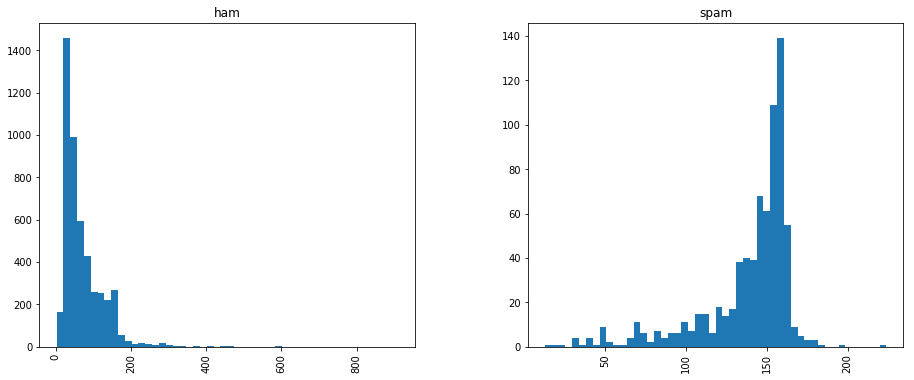

In [13]:
df.hist(column='length', by='Lable', bins=50, figsize=(15,6))

In [14]:
'''from above figure, we can see that most of ham (or not spam) messages only have length under 200 
while spam messages  have higher lentgh above 140 or 150 approximately.'''

'from above figure, we can see that most of ham (or not spam) messages only have length under 200 \nwhile spam messages  have higher lentgh above 140 or 150 approximately.'

Distribution spam/non-spam plots

In [15]:
count_Lable = pd.value_counts(df['Lable'], sort=True)


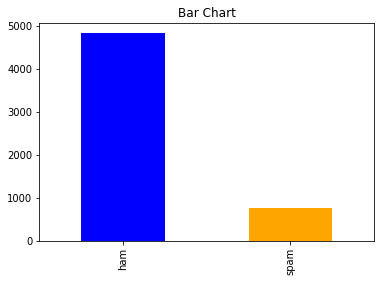

In [16]:
count_Lable.plot(kind='bar', color=['blue','orange'] )
plt.title("Bar Chart")
plt.show()

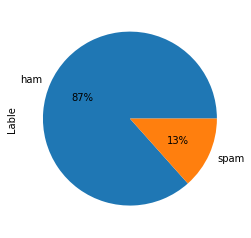

In [17]:
count_Lable.plot(kind='pie', autopct='%1.0f%%')
plt.title="Pie Chart"
plt.show()

In [18]:
from collections import Counter

In [19]:
#Non Spam Message
count1 = Counter(" ".join(df[df['Lable']=='ham']["Message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})


#---------------------------------------------------------------------
#Spam Message
count2 = Counter(" ".join(df[df['Lable']=='spam']["Message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

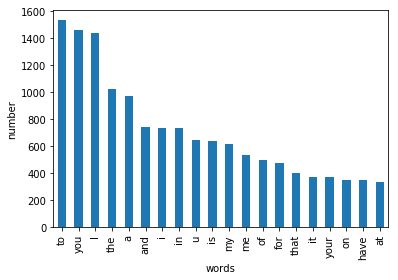

In [20]:
#Non Spam Words
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
#plt.title("More frequent words in non-spam messages")
plt.xlabel('words')
plt.ylabel('number')
plt.show()

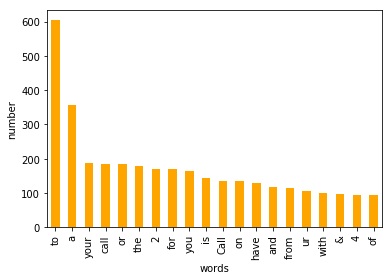

In [25]:
#Spam Words
df2.plot.bar(legend = False,  color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
#plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

# DATA PREPROCESSING

CREATE TOKENIZER

In [26]:
'''
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean text words
    '''
 

'\n    1. Remove punctuation\n    2. Remove stopwords\n    3. Return list of clean text words\n    '

In [27]:
import nltk
from nltk.corpus import stopwords
import string

In [35]:
def process_text(text):
    #Removing Punctuation
    nonpunch = [char for char in text if char not in string.punctuation]
    nonpunch = ''.join(nonpunch)
    
    #Removinr Stopwords
    clean_word = [word for word in nonpunch.split() if word.lower() not in stopwords.words('english')]
    
    return clean_word

In [36]:
df['Message'].apply(process_text).head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

# Model Creation

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(df['Message'], df['Lable'], test_size = 0.2)

here I'll just use pipeline in order to minimize effort on doing preprocessing, transforming then training data on both training dataset and test dataset. Using pipeline will handle them all in a few lines of codes.

In [39]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process_text)), #Convert String to Inrteger Count
    ('tfidf', TfidfTransformer()), #Convert interger to Weighted TF-IDF score
    ('clssifier',MultinomialNB()) #Train Tf-IDF vectors with Navie Bayes Classifier
    
])

In [40]:
pipeline.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function process_text at 0x0000000013869E18>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...tf=False, use_idf=True)), ('clssifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [42]:
X_Predict=pipeline.predict(X_test)

In [43]:
print(list(zip(Y_test,X_Predict)))

[('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('spam', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('spam', 'spam'), ('spam', 'spam'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('spam', 'spam'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('spam', 'spam'), ('ham', 'ham'), ('ham', 'ham'), ('spam', 'spam'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('spam', 'spam'), ('ham', 'ham'), ('spam', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('ham', 'ham'), ('spam', 'spam'), ('spam', 'ham'), ('spam', 'spam'), ('ham', 'ham'), ('spam', 'spam'), ('

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [45]:
#Classificatio Report
print(classification_report(Y_test,X_Predict))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       948
        spam       1.00      0.72      0.84       167

   micro avg       0.96      0.96      0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [46]:
#Accuracy Report
print(accuracy_score(Y_test,X_Predict))

0.9587443946188341


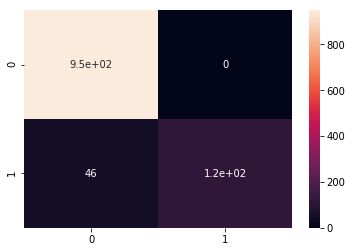

In [49]:
#Confusion Matix
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test,X_Predict),annot=True)